# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 596
['puerto natales', 'prado', 'sinabang', 'waitangi', 'khorramabad', 'bethel', 'kutum', 'itapetininga', 'bubaque', 'vorgashor', 'olonkinbyen', 'vadso', 'albany', 'ushuaia', 'port mathurin', 'ventspils', 'adamstown', 'el obeid', 'kushtagi', 'douglas', 'mora', 'mondragon', 'ilulissat', 'leffrinckoucke', 'petropavlovsk-kamchatsky', 'blackmans bay', 'stanley', 'krupki', 'ribeira brava', 'hamilton', 'wailua homesteads', 'puerto ayora', 'astara', 'thompson', "st. john's", 'longyearbyen', 'cockburn town', 'yellowknife', 'sinop', 'grytviken', 'sainte-menehould', 'esmeraldas', 'ribeira grande', 'fort bragg', 'badger', 'ken caryl', 'island harbour', 'takoradi', 'aykhal', 'qashyr', 'talnakh', 'puerto baquerizo moreno', 'san juan de miraflores', 'bodaybo', 'birjand', 'opuwo', 'canutama', 'vila franca do campo', 'punta arenas', 'hermanus', 'flin flon', 'college', 'anadyr', 'pangoa', 'tralee', 'taiohae', 'horta', 'tiksi', 'bredasdorp', 'lebu', 'kismayo', 'aalter', 'ma

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key
response = requests.get(url)

In [5]:
response.status_code

400

In [6]:
# Set the API base URL
# because I have a list of cities and not latitudes and longitudes yet, I need to use 
# the api call here --> https://openweathermap.org/api/geocoding-api
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
weather_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1 #will count each city record
set_count = 1 #will count each set of 50 city records as defined in the embedded if statement below

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        weather_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | prado
Processing Record 3 of Set 1 | sinabang
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | khorramabad
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | kutum
Processing Record 8 of Set 1 | itapetininga
Processing Record 9 of Set 1 | bubaque
Processing Record 10 of Set 1 | vorgashor
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | vadso
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | ventspils
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | el obeid
Processing Record 19 of Set 1 | kushtagi
Processing Record 20 of Set 1 | douglas
Processing Record 21 of Set 1 | mora
Processing Record 22 of Set 1 | mondragon
Processing Record 23 of Set 1 | ilulissat


Processing Record 40 of Set 4 | priozersk
Processing Record 41 of Set 4 | whitehorse
Processing Record 42 of Set 4 | ahau
City not found. Skipping...
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | tokar
Processing Record 45 of Set 4 | dingwall
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | shahrud
Processing Record 48 of Set 4 | tocopilla
Processing Record 49 of Set 4 | sake
Processing Record 0 of Set 5 | sitka
Processing Record 1 of Set 5 | new norfolk
Processing Record 2 of Set 5 | mahdia
Processing Record 3 of Set 5 | edgewater
Processing Record 4 of Set 5 | swan hill
Processing Record 5 of Set 5 | vangviang
Processing Record 6 of Set 5 | mount isa
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | mount pearl
Processing Record 9 of Set 5 | yelizovo
Processing Record 10 of Set 5 | afaahiti
Processing Record 11 of Set 5 | nyandoma
Processing Record 12 of Set 5 | flying fish cove
Processing Record 13 of Set 5 | p

Processing Record 28 of Set 8 | thinadhoo
Processing Record 29 of Set 8 | kirensk
Processing Record 30 of Set 8 | umatac village
City not found. Skipping...
Processing Record 31 of Set 8 | floro
Processing Record 32 of Set 8 | vanersborg
Processing Record 33 of Set 8 | saipan
Processing Record 34 of Set 8 | san patricio
Processing Record 35 of Set 8 | cestos city
Processing Record 36 of Set 8 | joshimath
Processing Record 37 of Set 8 | pointe-du-lac
Processing Record 38 of Set 8 | hanceville
Processing Record 39 of Set 8 | al artawiyah
Processing Record 40 of Set 8 | remire-montjoly
Processing Record 41 of Set 8 | forster
Processing Record 42 of Set 8 | uliastay
Processing Record 43 of Set 8 | patong
Processing Record 44 of Set 8 | chapeco
Processing Record 45 of Set 8 | el daein
City not found. Skipping...
Processing Record 46 of Set 8 | morondava
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | wanning
Processing Record 49 of Set 8 | tual
Processing Record 0 o

Processing Record 18 of Set 12 | tumut
Processing Record 19 of Set 12 | tongliao
Processing Record 20 of Set 12 | bonny
Processing Record 21 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 22 of Set 12 | usogorsk
Processing Record 23 of Set 12 | esteli
Processing Record 24 of Set 12 | saint-francois
Processing Record 25 of Set 12 | puntarenas
Processing Record 26 of Set 12 | salinopolis
Processing Record 27 of Set 12 | chui
Processing Record 28 of Set 12 | keflavik
Processing Record 29 of Set 12 | box elder
Processing Record 30 of Set 12 | 'aqrah
City not found. Skipping...
Processing Record 31 of Set 12 | alice springs
Processing Record 32 of Set 12 | jaisalmer
Processing Record 33 of Set 12 | umm kaddadah
Processing Record 34 of Set 12 | selfoss
Processing Record 35 of Set 12 | kavaratti
Processing Record 36 of Set 12 | viana do castelo
Processing Record 37 of Set 12 | euless
Processing Record 38 of Set 12 | nkove
Processing Record 39 of Set 12 | nizhneangarsk
Proc

In [7]:
# Convert the cities weather data into a Pandas DataFrame
weather_data_df = pd.DataFrame(weather_data)

# Show Record Count
weather_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [29]:
# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [28]:
# Export the City_Data into a csv
weather_data_df.to_csv("../my_output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
weather_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

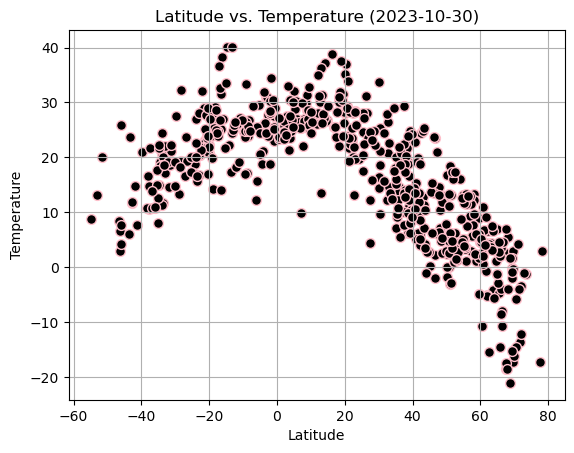

In [30]:
# Build scatter plot for latitude vs. temperature
x_values = weather_data_df['Lat']
y_values = weather_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='pink', c='black', s=50)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature (%s)' % time.strftime("%Y-%m-%d"))
plt.grid()

# Save the figure
plt.savefig("../my_output_data/Latitutde_temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

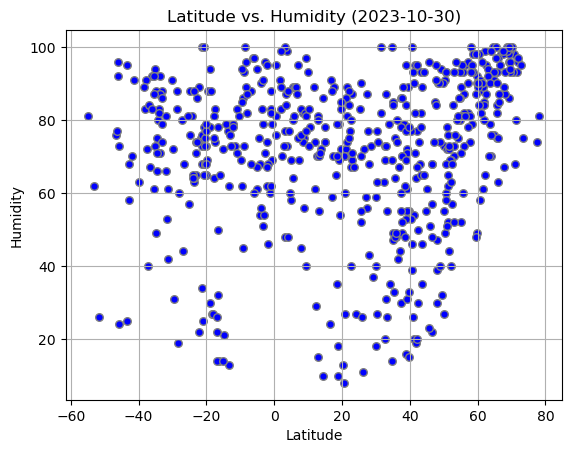

In [32]:
# Build the scatter plots for latitude vs. humidity
x_values = weather_data_df['Lat']
y_values = weather_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='grey', c='blue', s=30)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity (%s)' % time.strftime("%Y-%m-%d"))
plt.grid()


# Save the figure
plt.savefig("../my_output_data/Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

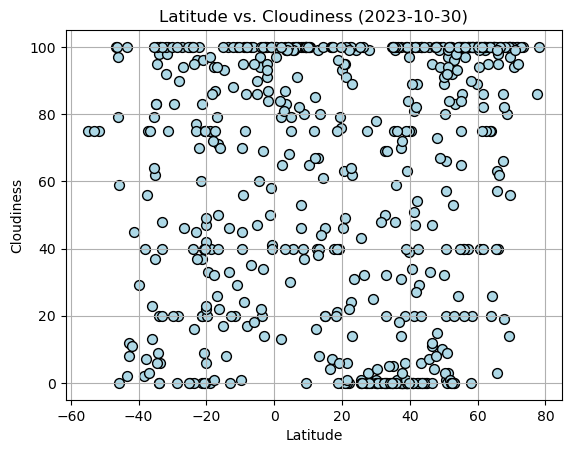

In [33]:
# Build the scatter plots for latitude vs. cloudiness
x_values = weather_data_df['Lat']
y_values = weather_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black', c='lightblue', s=50)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness (%s)' % time.strftime("%Y-%m-%d"))
plt.grid()


# Save the figure
plt.savefig("../my_output_data/Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

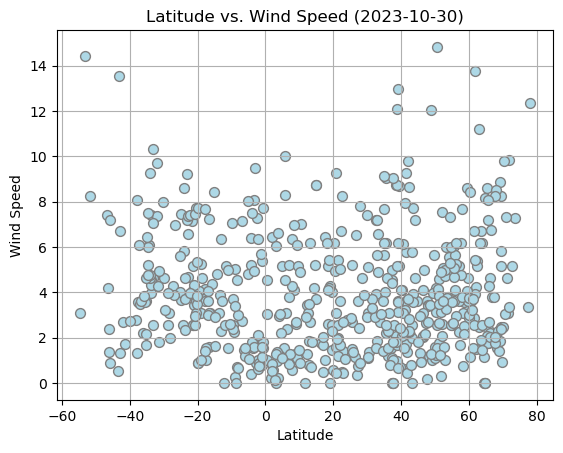

In [34]:
# Build the scatter plots for latitude vs. wind speed
x_values = weather_data_df['Lat']
y_values = weather_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='grey', c='lightblue', s=50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed (%s)' % time.strftime("%Y-%m-%d"))
plt.grid()


# Save the figure
plt.savefig("../my_output_data/Latitude_Windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = weather_data_df.loc[(weather_data_df["Lat"] >= 0),:]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = weather_data_df.loc[(weather_data_df["Lat"] <= 0),:]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7161472181434125
The r value is: -0.8462548186825364


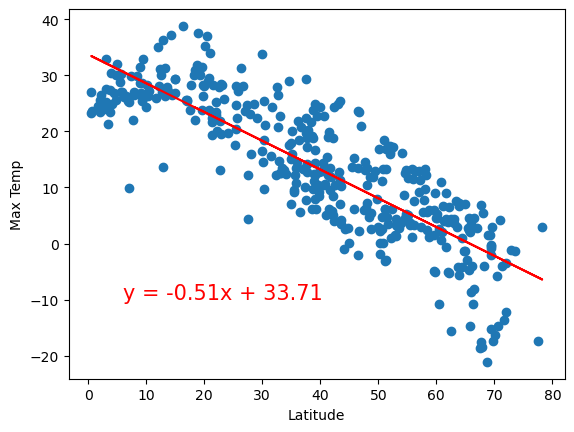

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
linear_regression_plots(x_values, y_values, "Max Temp", (6, -10))

The r-squared value is: 0.4121057168607252
The r value is: 0.6419546065421801


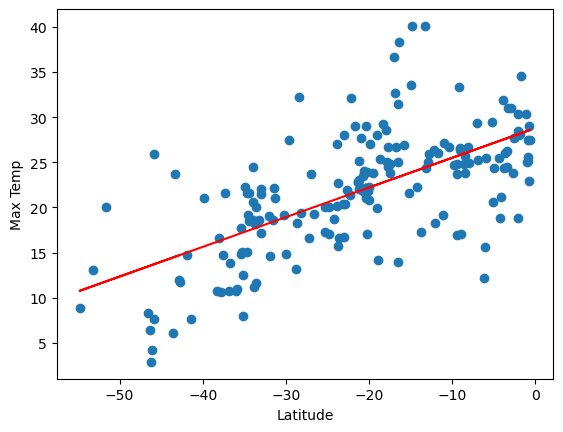

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
linear_regression_plots(x_values, y_values, "Max Temp", (6, -10))

**Discussion about the linear relationship:** The northern hemisphere regression model shows a strong negative correlation between latitude and temperature with an r-value of -0.84 indicating that the further north from the equator one is the cooler the temperature will be. The southern hemisphere regression model shows a moderate positive correlation between latitude and temperature with an r-value of 0.64, which indicate that the further south from the equator one is the cooler the temperature will be. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.05689741545789608
The r value is: 0.2385317912939407


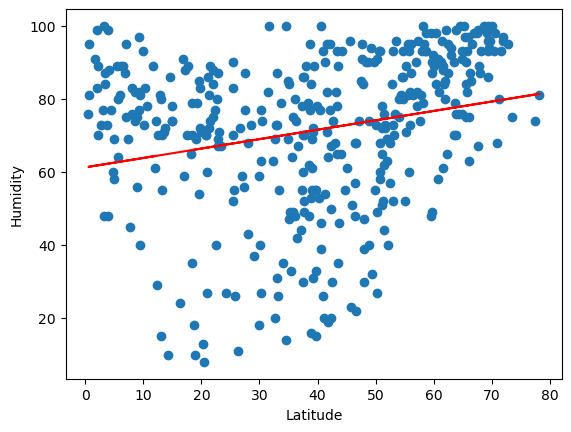

In [21]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
linear_regression_plots(x_values, y_values, "Humidity", (6, -10))

The r-squared value is: 0.0002808747046324618
The r value is: 0.016759316950056818


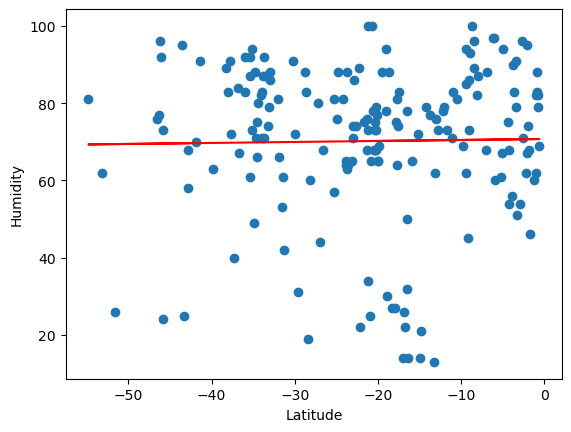

In [22]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
linear_regression_plots(x_values, y_values, "Humidity", (6, -10))

**Discussion about the linear relationship:** For both northern and southern hemisphere linear regression models the r-value is very weak at 0.24 and 0.02 respectfully. This indicates that latitude does not have any effect on the humidity of a location. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.024026517125811043
The r value is: 0.155004893876971


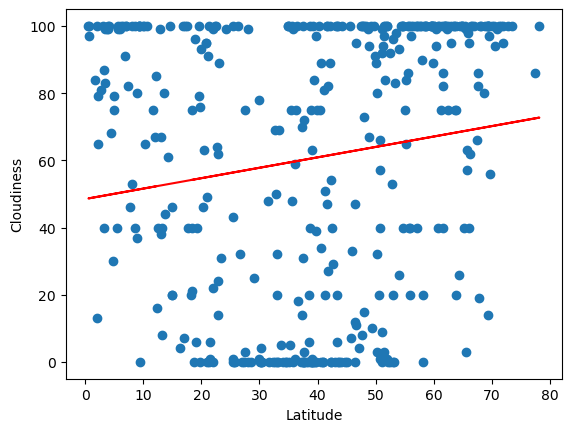

In [23]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
linear_regression_plots(x_values, y_values, "Cloudiness", (6, -10))

The r-squared value is: 0.020567354299943663
The r value is: 0.14341322916643243


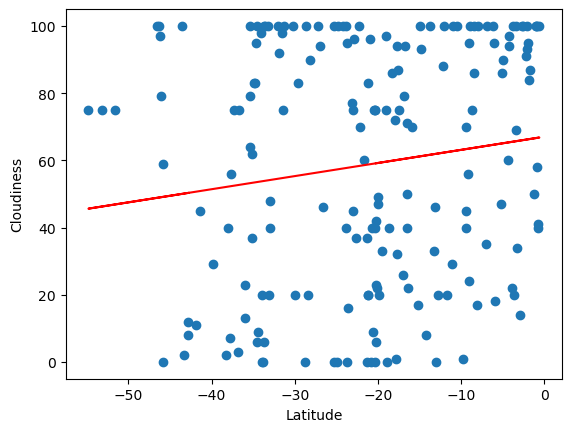

In [24]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
linear_regression_plots(x_values, y_values, "Cloudiness", (6, -10))

**Discussion about the linear relationship:** For both northern and southern hemisphere linear regression models, the r-value is very weak at 0.16 and 0.14 respectfully. This indicates that latitude does not have any effect on the cloudiness of a location.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.030396762354449474
The r value is: 0.17434667290903338


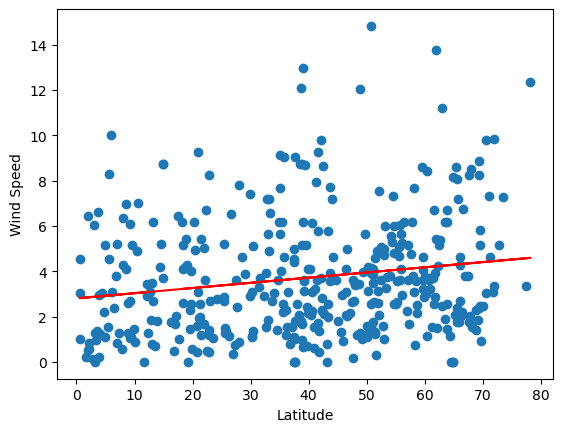

In [25]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
linear_regression_plots(x_values, y_values, "Wind Speed", (6, -10))

The r-squared value is: 0.06223904070051575
The r value is: -0.24947753546264592


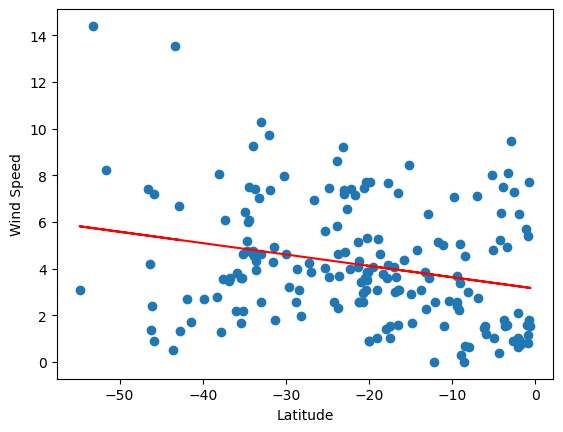

In [26]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
linear_regression_plots(x_values, y_values, "Wind Speed", (6, -10))

**Discussion about the linear relationship:** The northern and southern hemisphere linear regression models show r-values that are very weak at 0.17 and -0.25 respectfully. This indicates that latitude does not have any effect on the wind speed of a location.